In [99]:
from matplotlib import cm # Para manejo de colores
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

# Grafica en 3 Dimensiones

## ¿Cuál es la diferencia entre np.linspace y np.arange?

np.arange:

Devuelve valores espaciados uniformemente dentro de un intervalo dado.

np.linspace:

Devuelve números espaciados uniformemente en un intervalo específico.

La única diferencia que puedo ver es linspacetener más opciones... Como elegir incluir el último elemento.

¿Cuál de estos dos recomendarías y por qué? ¿Y en qué casos es np.linspacesuperior?


## Respuesta
np.linspacele permite definir cuántos valores obtiene, incluido el valor mínimo y máximo especificado. Infiere el tamaño del paso:

>>> np.linspace(0,1,11)
array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
np.arangele permite definir el tamaño del paso e infiere el número de pasos (el número de valores que obtiene).

>>> np.arange(0,1,.1)
array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

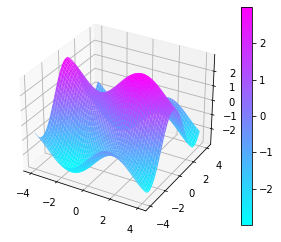

In [100]:
def f(x,y):
    return np.sin(x) + 2*np.cos(y) # 4 + y**2 - x**2 para la silla de montar

N = 100

x = np.linspace(-4, 4, num=N)
y = np.linspace(-4, 4, num=N)

x, y = np.meshgrid(x,y)

z = f(x, y)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

surf = ax.plot_surface(x,y,z, cmap=cm.cool)

fig.colorbar(surf)

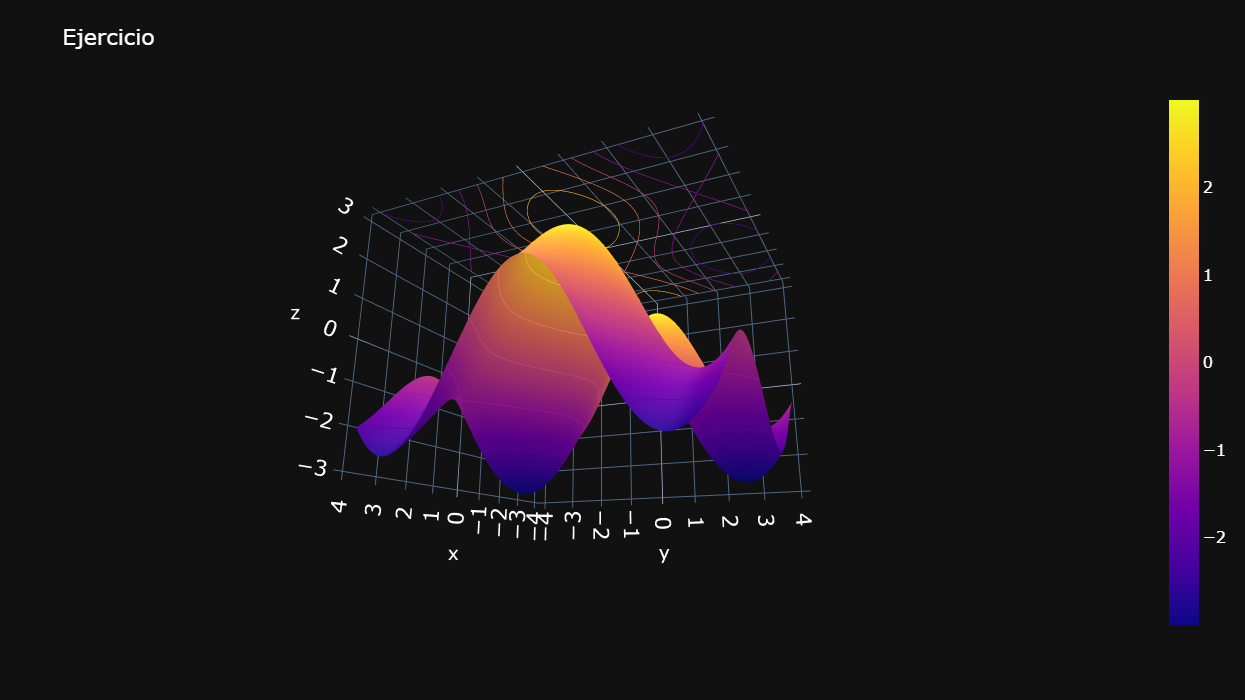

In [101]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.update_layout(title='Ejercicio', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90),
                  font = dict(family = 'verdana', size = 16, color = 'white'),
                  template = 'plotly_dark')

fig.show()

## curvas de nivel

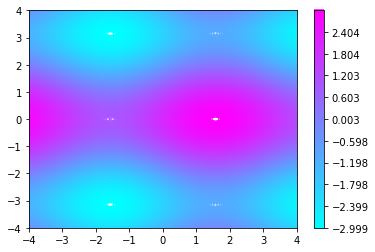

In [102]:
fig2, ax2 = plt.subplots()
level_map = np.linspace(np.min(z), np.max(z), num=1000)

cp = ax2.contour(x, y, z, levels= level_map, cmap= cm.cool)

fig2.colorbar(cp)

<function matplotlib.pyplot.show(close=None, block=None)>

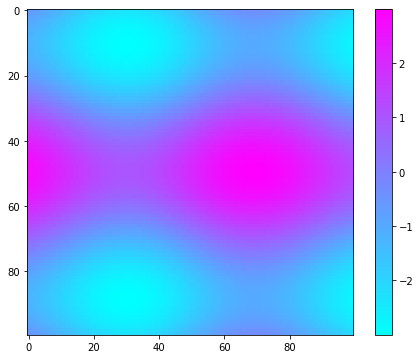

In [106]:
%matplotlib inline

plt.figure(figsize = (8, 6))
plt.imshow(z, cmap = cm.cool)
plt.colorbar()
plt.show

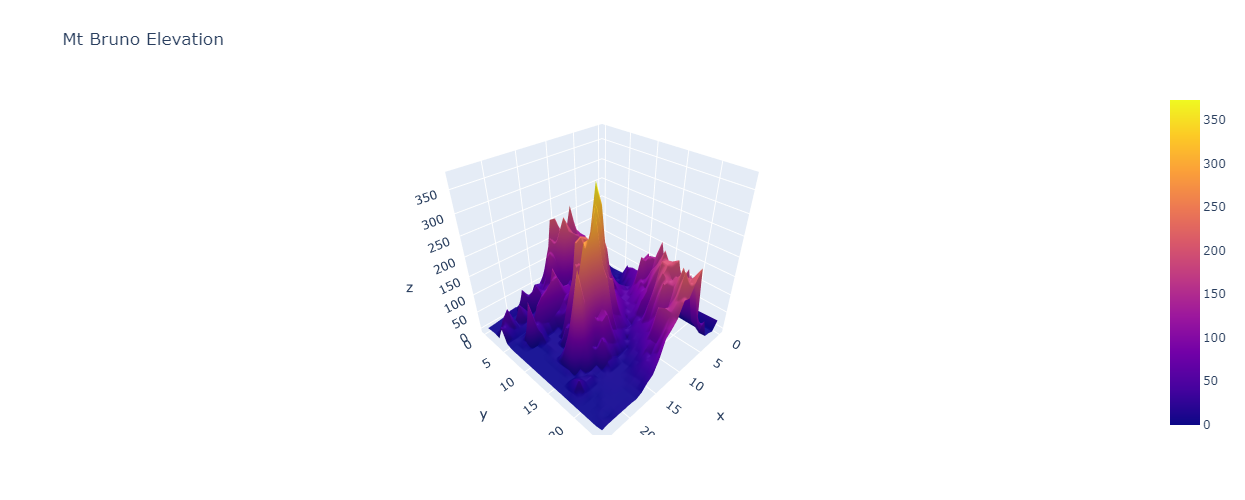

In [104]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()